In [1]:
import pandas
import datetime
import numpy
import scipy.optimize
from scipy.stats import linregress
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import time
import bs4
import urllib
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter, MaxNLocator
%matplotlib inline

In [2]:
velsDataDF = pandas.read_csv( "../data/processed-vels-geomag-fin.txt", sep=' ',\
                            infer_datetime_format=True,\
                            parse_dates=["date"])
# Get actual SAPS azimuths
velsDataDF["azim"] = -90.-velsDataDF["azim"]
print velsDataDF.shape
velsDataDF = velsDataDF.dropna()
print velsDataDF.shape

(374550, 25)
(274605, 25)


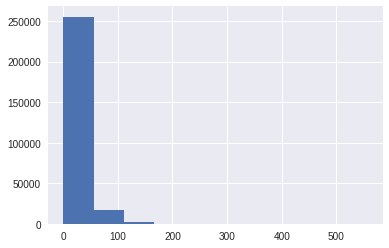

In [3]:
velsDataDF["velSTD"].hist()

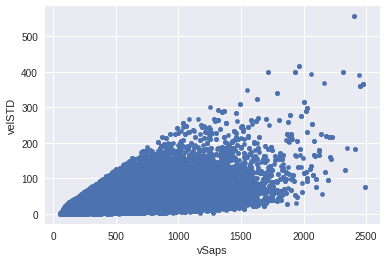

In [4]:
velsDataDF.plot(x="vSaps", y="velSTD", kind="scatter")

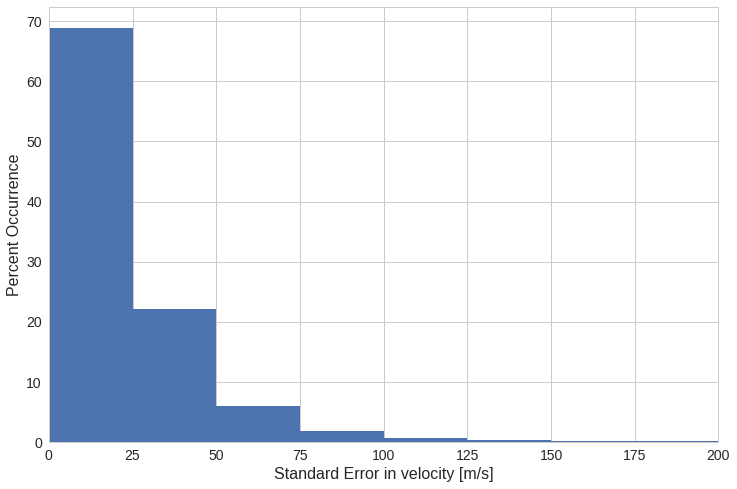

In [5]:
sns.set_style('whitegrid')
f = plt.figure(figsize=(12, 8))

ax = f.add_subplot(1,1,1)
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]
# sns.distplot( velsDataDF["velSTD"].values, kde=False,\
#              hist=True, color="firebrick", bins=bins,ax=ax )
weights = numpy.ones_like(\
            velsDataDF["velSTD"].values)*100./float(\
                len(velsDataDF["velSTD"].values))
n, bins, rectangles = ax.hist(velsDataDF["velSTD"].values,\
                              bins=bins, weights=weights)
ax.set_xlim([0,200])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel("Percent Occurrence", fontsize=16)
ax.set_xlabel("Standard Error in velocity [m/s]", fontsize=16)
plt.savefig("../figs/vel_std_hist.eps",bbox_inches='tight')
plt.savefig("../figs/vel_std_hist.png",bbox_inches='tight')